<I><h1>The Third Homework of Artificial Neural Network</h1></I>
<I><h2>Name: Ata Shaker</h2></I>
<I><h2>Std No.: 040200925</h2></I>

<B><h2>The First Question</h2></B>

In [1]:
# This question is linguistically valguely worded and unclear about what it asks.
p_tot_pop = 505505
p_leave = 56780
p_pop = 505505*(9/10)
p_number = 0
p_number += p_tot_pop
p_number *= (105/100)
p_number *= (95/100)
p_number -= 25000
print(f'p_number is equal to {p_number}')

p_number is equal to 479241.2375


<B><h2>The Second Question</h2></B>

In [20]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from itertools import repeat
from matplotlib import pyplot as plt 

In [61]:
with open('AI_Dataset1.txt') as txt_file: # Opening  datafile
    txt_lines = txt_file.readlines() # Reading every line

lines_list = []
for line in txt_lines:
    temp = [item for item in line.split('\t') if (item != '' and item != '\n' and item != ' ')] # Removing all tabs from each line
    if temp != []:
        lines_list.append(temp)

for lst in lines_list: # Further cleaning
    if len(lst) > 5:
        lst[-1] = lst[-1].split('\n')[0]
        lst[1:] = map(float, lst[1:]) # Converting data from string to float

<I><h3>Since there are more than 100 measurements across 27 channels, we cannot plot all the data at once. To solve this, I will only plot the first measurement which entails more than 54 graphs.</h3></I>

In [62]:
cols_0 = list(zip(repeat(f'Channel 0 Normal'), ['Voltage', 'Current 1', 'Current 2'])) # Dummy column names for our dataframe
df = pd.DataFrame({cols_0[0]: np.zeros((61)),cols_0[1]: np.zeros((61)), cols_0[2]: np.zeros((61))}) # Dummy data (61 zeros) for dataframe
channel_number = 1

for index, lst in enumerate(lines_list):
    if lst[0] == f'Voltage Sweep Channel {channel_number}': 
        cols = list(zip(repeat(f'Channel {channel_number} Normal'), ['Voltage', 'Current 1', 'Current 2'])) # Columns for temp_df
        temp_df = pd.DataFrame({cols[0]: sorted(lst[1:]), cols[1]: sorted(lines_list[index + 1][1:]), cols[2]: sorted(lines_list[index + 1][1:])}) 
        # Creating temp_df which includes the normal voltae, normal current 1, and normal currnet 2 belonging to Nth channel 
        df = df.merge(temp_df, right_index = True, left_index = True, how = 'outer') # Merging temp_df with df equals appending an element to a list

    # Identical operations are carreied out for reverse part as they were for Normal part of each channel.
    elif lst[0] == f'Voltage Sweep Reversed Channel {channel_number}': 
        cols = list(zip(repeat(f'Channel {channel_number} Reversed'), ['Voltage', 'Current 1', 'Current 2']))
        temp_df = pd.DataFrame({cols[0]: sorted(lst[1:]), cols[1]: sorted(lines_list[index + 1][1:]), cols[2]: sorted(lines_list[index + 1][1:])})
        df = df.merge(temp_df, right_index = True, left_index = True, how = 'outer')
        
        channel_number = channel_number + 1 if channel_number < 28 else channel_number # Updating channel_number
        
    if channel_number == 28: # Breaking after extracting the first measurement of the 27 channels
        break

df = df.drop('Channel 0 Normal', axis = 1) # Dropping the dummy part which was created at the very beginning
df

C:\Users\ata79\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


Channel 1 Normal                     Channel 1 Reversed            \
            Voltage Current 1 Current 2            Voltage Current 1   
0               0.0  0.000000  0.000000          -0.000993  0.000000   
1               0.0  0.000000  0.000000           0.099999  0.000000   
2               0.0  0.000000  0.000000           0.201134  0.000000   
3               0.0  0.000000  0.000000           0.300006  0.000000   
4               0.0  0.000000  0.000000           0.400005  0.000000   
..              ...       ...       ...                ...       ...   
56              4.3  0.001266  0.001266           5.599990  0.003747   
57              4.4  0.001401  0.001401           5.699990  0.003997   
58              4.5  0.001544  0.001544           5.799990  0.004253   
59              4.6  0.001696  0.001696           5.899990  0.004512   
60              4.7  0.001856  0.001856           5.999980  0.004760   

             Channel 2 Normal                     Channel 2 Reversed  ...  \
   Current 2          Voltage Current 1 Current 2            Voltage  ...   
0   0.000000          0.00000  0.000000  0.000000          -0.000014  ...   
1   0.000000          0.00000  0.000000  0.000000           0.099994  ...   
2   0.000000          0.00000  0.000000  0.000000           0.200013  ...   
3   0.000000          0.00000  0.000000  0.000000           0.299982  ...   
4   0.000000          0.00000  0.000000  0.000000           0.399992  ...   
..       ...              ...       ...       ...                ...  ...   
56  0.003747          4.50000  0.001407  0.001407           5.600000  ...   
57  0.003997          4.60000  0.001544  0.001544           5.699990  ...   
58  0.004253          4.70000  0.001689  0.001689           5.800000  ...   
59  0.004512          4.80000  0.001843  0.001843           5.899990  ...   
60  0.004760          4.89605  0.001999  0.001999           5.999980  ...   

   Channel 26 Normal Channel 26 Reversed                      \
           Current 2             Voltage Current 1 Current 2   
0           0.000000           -0.003039  0.000000  0.000000   
1           0.000000            0.099361  0.000000  0.000000   
2           0.000000            0.198278  0.000000  0.000000   
3           0.000000            0.296965  0.000000  0.000000   
4           0.000000            0.399385  0.000000  0.000000   
..               ...                 ...       ...       ...   
56          0.001111            5.599990  0.006582  0.006582   
57          0.001308            5.699990  0.007074  0.007074   
58          0.001522            5.799990  0.007574  0.007574   
59          0.001755            5.899980  0.008075  0.008075   
60          0.001999            5.999910  0.008527  0.008527   

   Channel 27 Normal                     Channel 27 Reversed            \
             Voltage Current 1 Current 2             Voltage Current 1   
0          -0.000548  0.000000  0.000000           -0.002075  0.000000   
1           0.000000  0.000000  0.000000            0.097077  0.000000   
2           0.000000  0.000000  0.000000            0.199475  0.000000   
3           0.000000  0.000000  0.000000            0.297596  0.000000   
4           0.000000  0.000000  0.000000            0.397033  0.000000   
..               ...       ...       ...                 ...       ...   
56          3.900000  0.001054  0.001054            5.599990  0.007325   
57          4.000000  0.001256  0.001256            5.699990  0.007868   
58          4.100000  0.001477  0.001477            5.799980  0.008421   
59          4.200000  0.001718  0.001718            5.899970  0.008972   
60          4.300000  0.001977  0.001977            5.999900  0.009460   

              
   Current 2  
0   0.000000  
1   0.000000  
2   0.000000  
3   0.000000  
4   0.000000  
..       ...  
56  0.007325  
57  0.007868  
58  0.008421  
59  0.008972  
60  0.009460  

[61 rows x 162 columns]

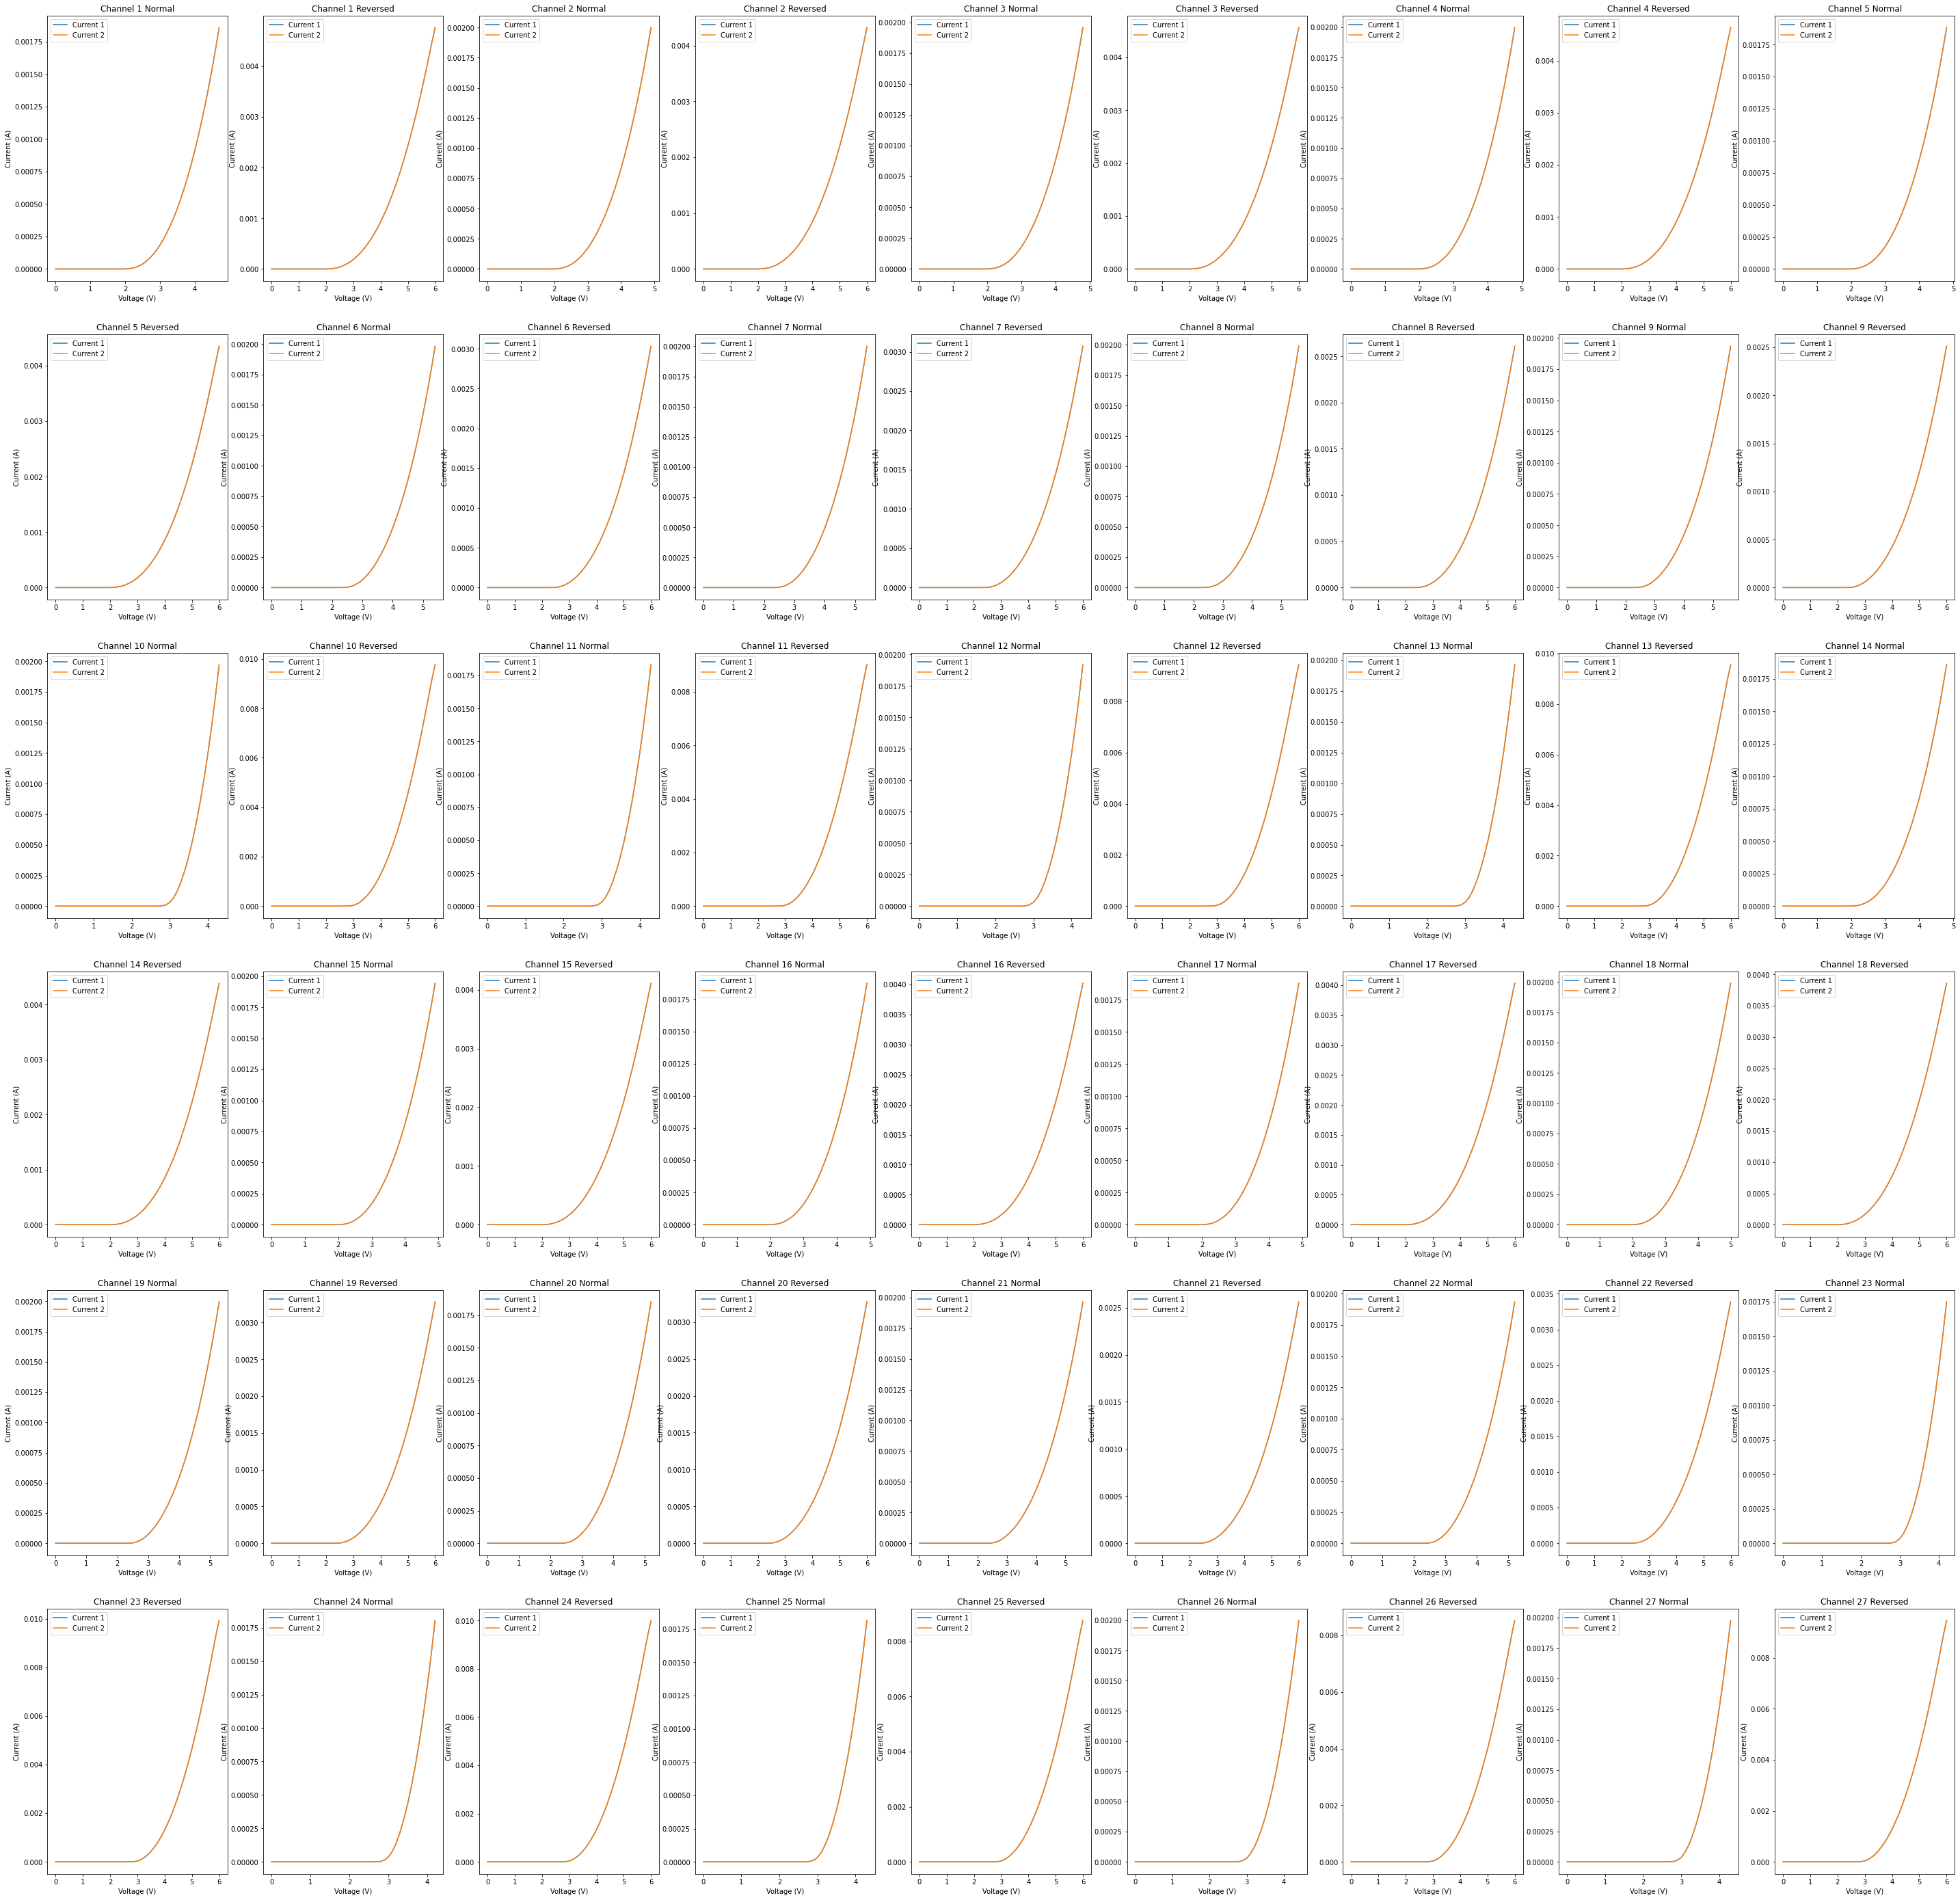

In [63]:
columns_list = list(df.columns)
plt.figure(figsize= (50, 50)) # Creating a figure with 50*50 inches 
for index, tupl in enumerate(columns_list):
    if index % 3 == 0:
        plt.subplot(6, 9, index//3 + 1) # Creating a 9 by 6 grid for 54 graphs
        plt.plot(df[tupl], df[columns_list[index+1]], df[tupl], df[columns_list[index+2]])
        plt.title(tupl[0]) # Adding title
        plt.legend(['Current 1', 'Current 2']) # Adding legend
        plt.xlabel('Voltage (V)') # Labeling x-axis
        plt.ylabel('Current (A)') # labeling y-axis

plt.savefig('I-V Degradation Graphs.pdf') # Saving the graph as a PDF file